In [13]:
%pip uninstall qiskit qiskit-machine-learning qiskit-aer -y
%pip uninstall qiskit-terra qiskit-ibmq-provider qiskit-ibm-runtime qiskit-experiments -y


Found existing installation: qiskit 1.3.1Note: you may need to restart the kernel to use updated packages.

Uninstalling qiskit-1.3.1:
  Successfully uninstalled qiskit-1.3.1
Found existing installation: qiskit-machine-learning 0.8.2
Uninstalling qiskit-machine-learning-0.8.2:
  Successfully uninstalled qiskit-machine-learning-0.8.2
Found existing installation: qiskit-aer 0.17.1
Uninstalling qiskit-aer-0.17.1:
  Successfully uninstalled qiskit-aer-0.17.1
Found existing installation: qiskit-ibm-runtime 0.39.0
Uninstalling qiskit-ibm-runtime-0.39.0:
  Successfully uninstalled qiskit-ibm-runtime-0.39.0
Note: you may need to restart the kernel to use updated packages.


In [1]:
%pip install "qiskit==1.4.3" "qiskit-machine-learning==0.8.3" "qiskit-aer" "torch"


   ---------------------------------------- 0.0/6.5 MB ? eta -:--:--
   ---- ----------------------------------- 0.8/6.5 MB 5.6 MB/s eta 0:00:02
   ------------ --------------------------- 2.1/6.5 MB 6.2 MB/s eta 0:00:01
   ---------------------- ----------------- 3.7/6.5 MB 6.4 MB/s eta 0:00:01
   -------------------------------- ------- 5.2/6.5 MB 6.5 MB/s eta 0:00:01
   ---------------------------------------- 6.5/6.5 MB 6.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   -------- ------------------------------- 2.6/12.6 MB 12.5 MB/s eta 0:00:01
   -------------- ------------------------- 4.5/12.6 MB 10.3 MB/s eta 0:00:01
   ------------------- -------------------- 6.0/12.6 MB 9.5 MB/s eta 0:00:01
   ------------------------ --------------- 7.9/12.6 MB 9.4 MB/s eta 0:00:01
   ------------------------------ --------- 9.7/12.6 MB 9.1 MB/s eta 0:00:01
   ------------------------------------ --- 11.5/12.6 MB 9.0 MB/s eta 0:00:01
   -------------


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import matplotlib.pyplot as plt

from torch import Tensor
from torch.nn import Linear, CrossEntropyLoss, MSELoss
from torch.optim import LBFGS

from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit_machine_learning.utils import algorithm_globals
from qiskit_machine_learning.neural_networks import SamplerQNN, EstimatorQNN
from qiskit_machine_learning.connectors import TorchConnector

# Set seed for random generators
algorithm_globals.random_seed = 42

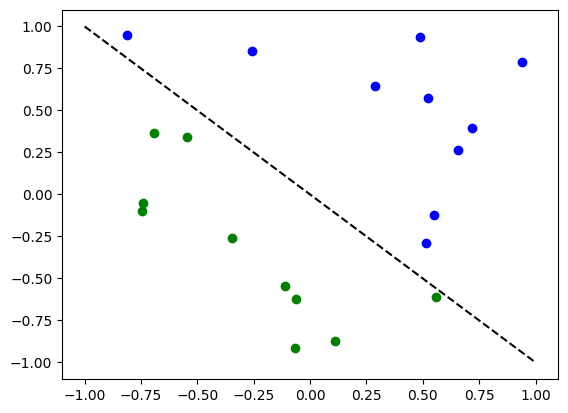

In [4]:
# Generate random dataset

# Select dataset dimension (num_inputs) and size (num_samples)
num_inputs = 2
num_samples = 20

# Generate random input coordinates (X) and binary labels (y)
X = 2 * algorithm_globals.random.random([num_samples, num_inputs]) - 1
y01 = 1 * (np.sum(X, axis=1) >= 0)  # in { 0,  1}, y01 will be used for SamplerQNN example
y = 2 * y01 - 1  # in {-1, +1}, y will be used for EstimatorQNN example

# Convert to torch Tensors
X_ = Tensor(X)
y01_ = Tensor(y01).reshape(len(y)).long()
y_ = Tensor(y).reshape(len(y), 1)

# Plot dataset
for x, y_target in zip(X, y):
    if y_target == 1:
        plt.plot(x[0], x[1], "bo")
    else:
        plt.plot(x[0], x[1], "go")
plt.plot([-1, 1], [1, -1], "--", color="black")
plt.show()

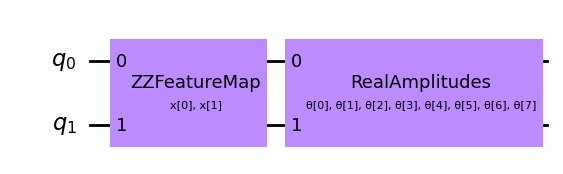

In [5]:
# Set up a circuit
feature_map = ZZFeatureMap(num_inputs)
ansatz = RealAmplitudes(num_inputs)
qc = QuantumCircuit(num_inputs)
qc.compose(feature_map, inplace=True)
qc.compose(ansatz, inplace=True)
qc.draw(output="mpl", style="clifford")